# A Look at Car Emissions Based on Vehicle Class and Size

### Motivations:

In recent years the transportation industry has been under scrutiny for it's contributions to global warming. In the over-developed nations, we find ourselves in the caveat of relying on vehicles and planes to conduct our daily activities while also mitigating ways to reduce their implications on living beings. To reduce these effects, the integration of hybrid and electric vehicle has begun, however, it will take decades to adapt on a national-global scale. 

In this project, I used a simple dataset found in [kaggle](https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles) to investigate the emission-cost of the types of vehicles that are currently on the road. It may be general knowledge that bigger cars omit higher levels of emissions but we'll see for ourselves if that's true!

### Importing the libraries we need:

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns 
from cycler import cycler
import matplotlib as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/CO2 Emissions_Canada.csv')

Let's peep at the data 👀

In [3]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [6]:
data.nunique(axis=0)

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

At first glance, we see that we have a combination of numerical and categorical attributes. We'll probably be selecting a few of the columns to simplify things. We also see that the numerical values vary in range and we'll deal with this later. 

### Setting up a project images folder

A dedicated space to save our visualizations will make it easier for us to access our figures and craft a nice presentation to describe our findings.

In [7]:
IMG_PATH = Path() /'images'
IMG_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMG_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#source: Ageron handson-ml3

### Looking at the distribution of numerical values:

Distributions helps us understand the spread of the values across each column. We can gain a good understanding of the percentiles and the "center" or most "common" range of certain values. For example, when looking below we can see that most cars in the dataset have a smaller engine than not, and that city fuel consumption fall somewhere between 12 and 15 L/100 km.

In [8]:
num_cols = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 
           'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 
           'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']

In [9]:
numeric_ftrs = data[num_cols]

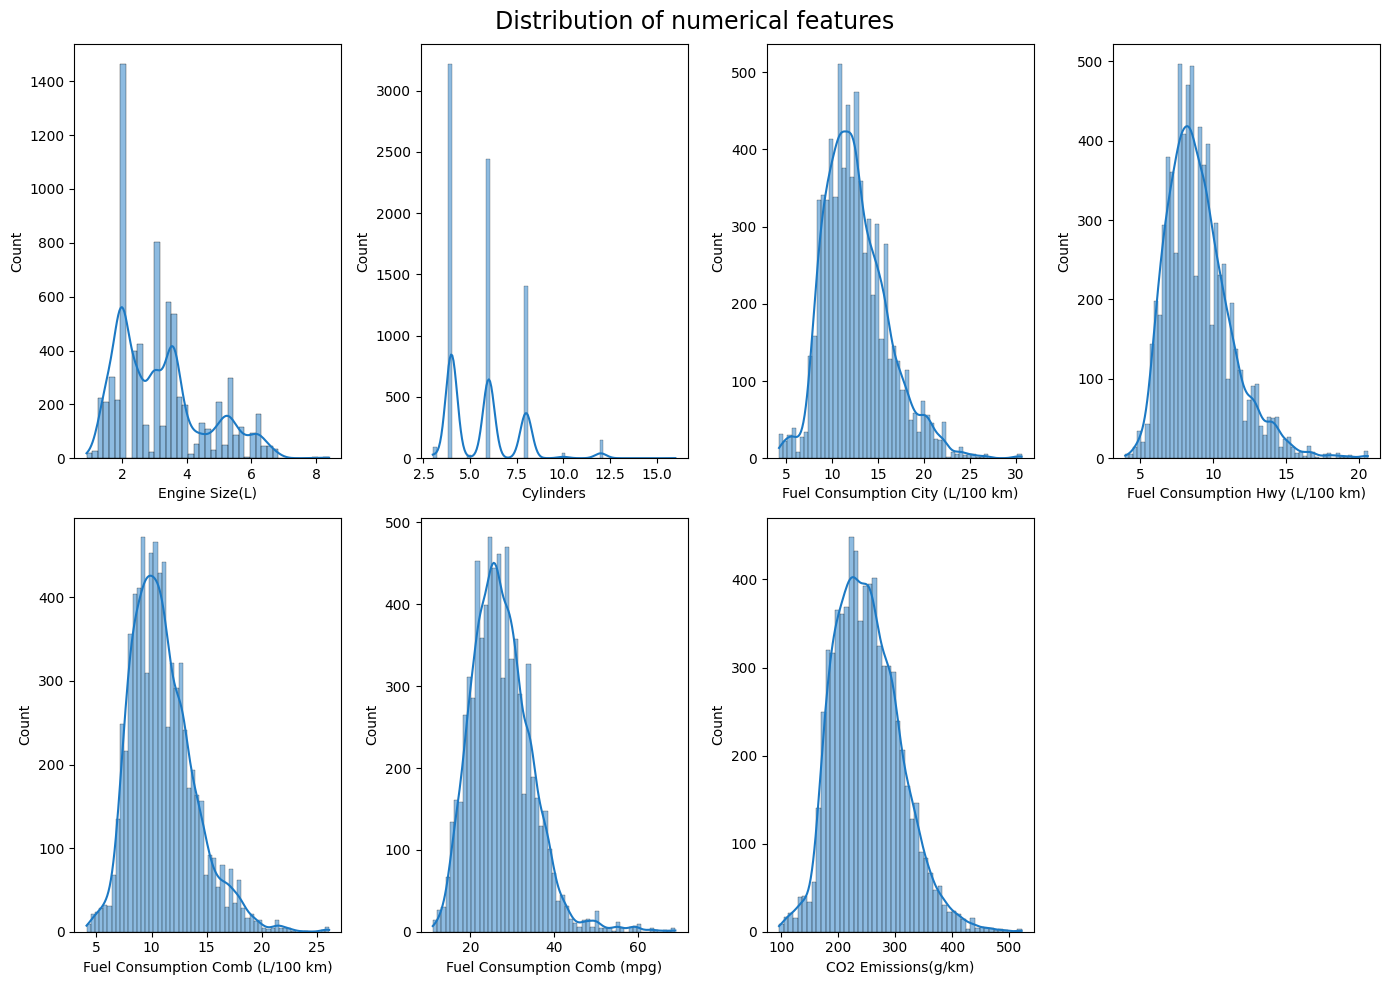

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
plt.suptitle('Distribution of numerical features', fontsize='17')
plt.subplots_adjust(top=0.93, wspace=1)


for i in range(len(num_cols)):
    plt.subplot(2, 4, i+1)
    sns.histplot(x=data[num_cols[i]], kde=True, color='#1C79C4')

save_fig('numeric_features_distplots')
plt.show();

### Generating test set 

This is an important first step before further analyzing the data. Our test set needs to be set aside and kept untouched so that we can test our model on unseen data. Set it and forget it! 

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
print('Train set:', len(train_set))
print('Test set:', len(test_set))

Train set: 5908
Test set: 1477


In this particular dataset, it is difficult to select unique features to assign as an ID. As such, Index will be used though there are challenges with this approach. The main challenge is that if new data is ever added, it would need to be appended at the end of the data to continue index values, otherwise the order is lost. Seeing as though this is a practice project we will continue with this approach. 

In [12]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def train_test_split_by_id(data, test_ratio, id_column):
    ids=data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

data_with_id = data.reset_index() 
train_set, test_set = train_test_split_by_id(data_with_id, 0.2, 'index')

In [13]:
test_set.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7261,PORSCHE,Panamera 4 Executive,FULL-SIZE,3.0,6,AM8,Z,12.4,9.0,10.9,26,253
4489,BMW,M6 CABRIOLET,SUBCOMPACT,4.4,8,AM7,Z,17.3,11.6,14.7,19,344
1539,GMC,SIERRA,PICKUP TRUCK - STANDARD,6.2,8,A8,Z,16.1,11.4,14.0,20,322
3532,CHEVROLET,SILVERADO,PICKUP TRUCK - STANDARD,5.3,8,A6,X,14.6,10.3,12.7,22,297
6418,TOYOTA,4Runner 4WD,SUV - STANDARD,4.0,6,AS5,X,14.3,11.9,13.2,21,308


<Axes: >

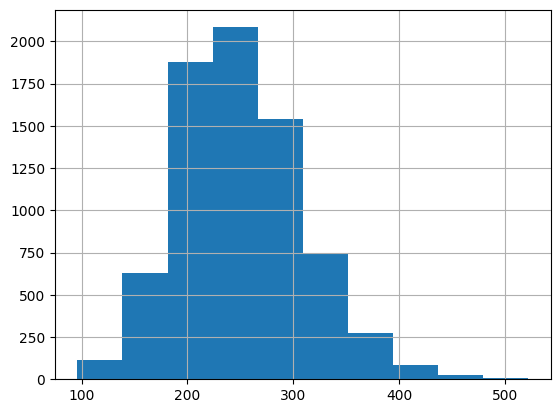

In [14]:
data['CO2 Emissions(g/km)'].hist()

Creating a Cylinders category

In [15]:
data['cylinders_cat'] = pd.cut(data['Cylinders'],
                              bins=[0., 1.5, 3.0, 4.5, 6, np.inf],
                              labels=[1, 2, 3, 4, 5])

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['Cylinders']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [17]:
strat_test_set['Cylinders'].value_counts() / len(strat_test_set)

4     0.436019
6     0.331077
8     0.190251
12    0.020311
3     0.012864
10    0.005416
5     0.003385
16    0.000677
Name: Cylinders, dtype: float64

Dropping the cylynders_cat column from the test data

In [18]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('cylinders_cat', axis=1, inplace=True)

### Exploration of training set

In [19]:
car_data = strat_train_set.copy()

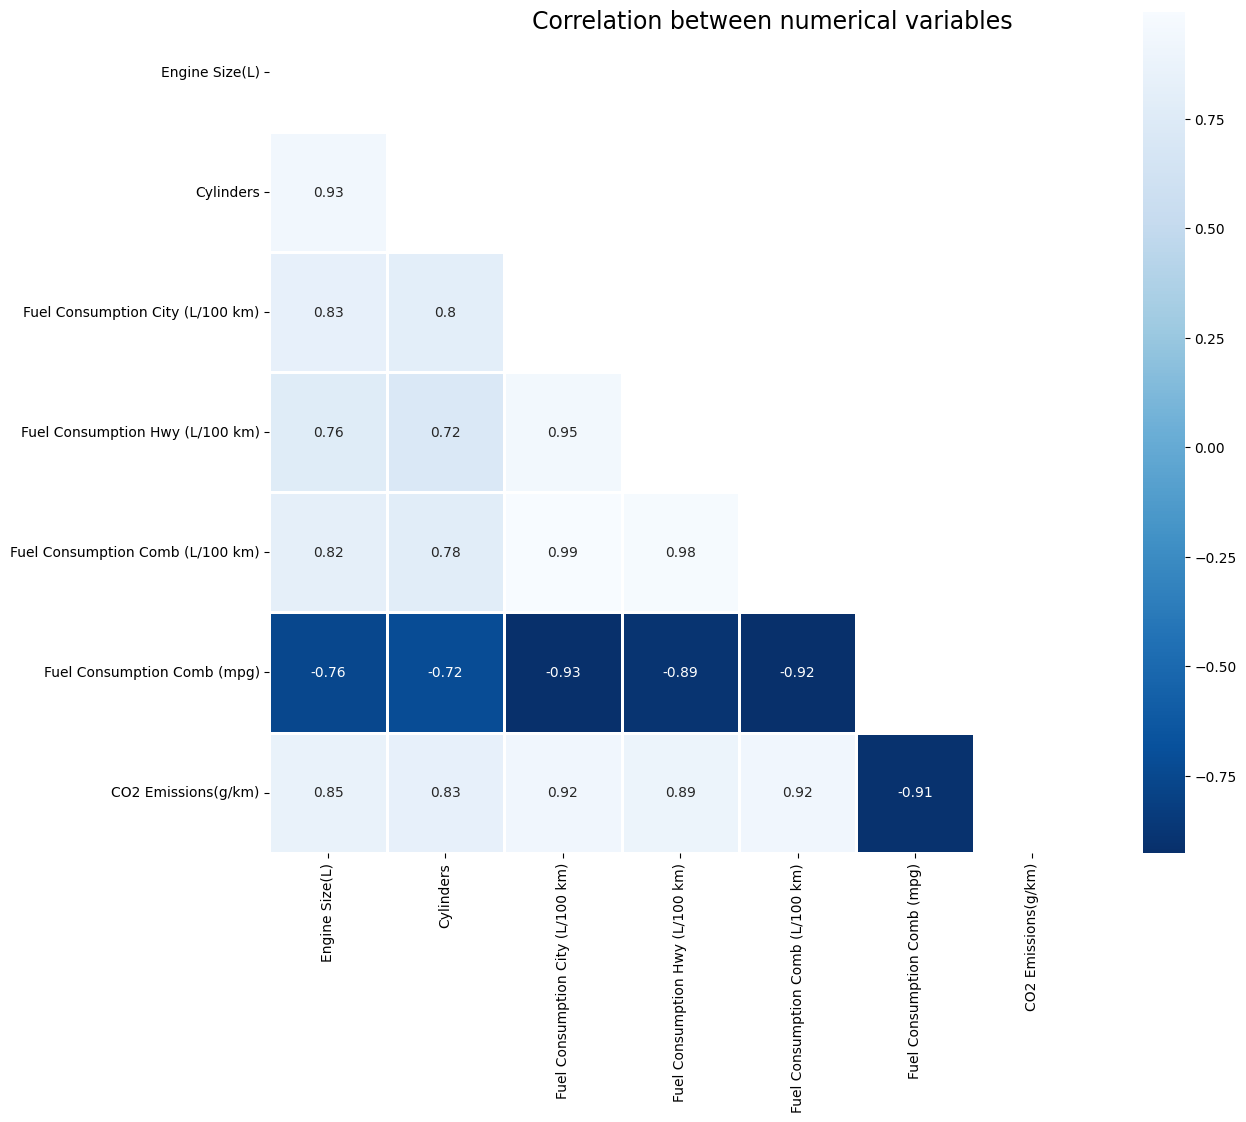

In [20]:
corr = car_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
save_fig('variable_correlations')
corr_plot = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
           cmap=sns.color_palette("Blues_r",as_cmap=True), mask=mask, cbar=True, 
            linecolor='white', linewidth=2)  ##.set(title='Correlation between numerical variables');
f.suptitle('Correlation between numerical variables', fontsize='17');




In the figure above, let's look at CO2 Emissions correlations on the bottom. It appears that Fuel Consumption City (L/100 km) and Fuel Consumption Comb (L/100 km) are the most correlated with CO2 emissions at 0.92. 

Let's take it a step forward and look at the strongest correlations for Fuel Consumption City (L/100 km) and Fuel Consumption Comb (L/100 km). Doing this we can see that Engine Size(L) is actually the strongest correlation for both at 0.83. 

Let's keep unraveling the onion and take a look at Engine Size(L) and we find that its strongest correlation is Cylinders 0.93. Looking at Cylinders, we see that the strongest correlation is CO2 Emissions (g/km) at 0.83 followed by Fuel Consumption City (L/100 km).

A car is a unified structure, the correlations between features make sense when we think about how all the different parts work. Our goal with breaking down correlations is to try to make sense of the different features even when it's not as straightforward as a car. This simple correlation matrix can help us make sense of our data!

Another thing, keeping Fuel Consumption City (L/100 km) and Fuel Consumption Comb (L/100 km) may seem redundant but we won't make a decision on this observation yet.

In [21]:
# corr_features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)', 
#                  'Fuel Consumption City (L/100 km)', 'CO2 Emissions(g/km)' ]


In [22]:
corr_features = car_data.rename(columns={'Engine Size(L)': 'Engine Size', 
                                     'Fuel Consumption Comb (L/100 km)': 'Fuel Consumption Comb', 
                                     'Fuel Consumption City (L/100 km)': 'Fuel Consumption City', 
                                     'Fuel Consumption Hwy (L/100 km)': 'Fuel Consumption Hwy', 
                                     'CO2 Emissions(g/km)': 'CO2 Emissions' })



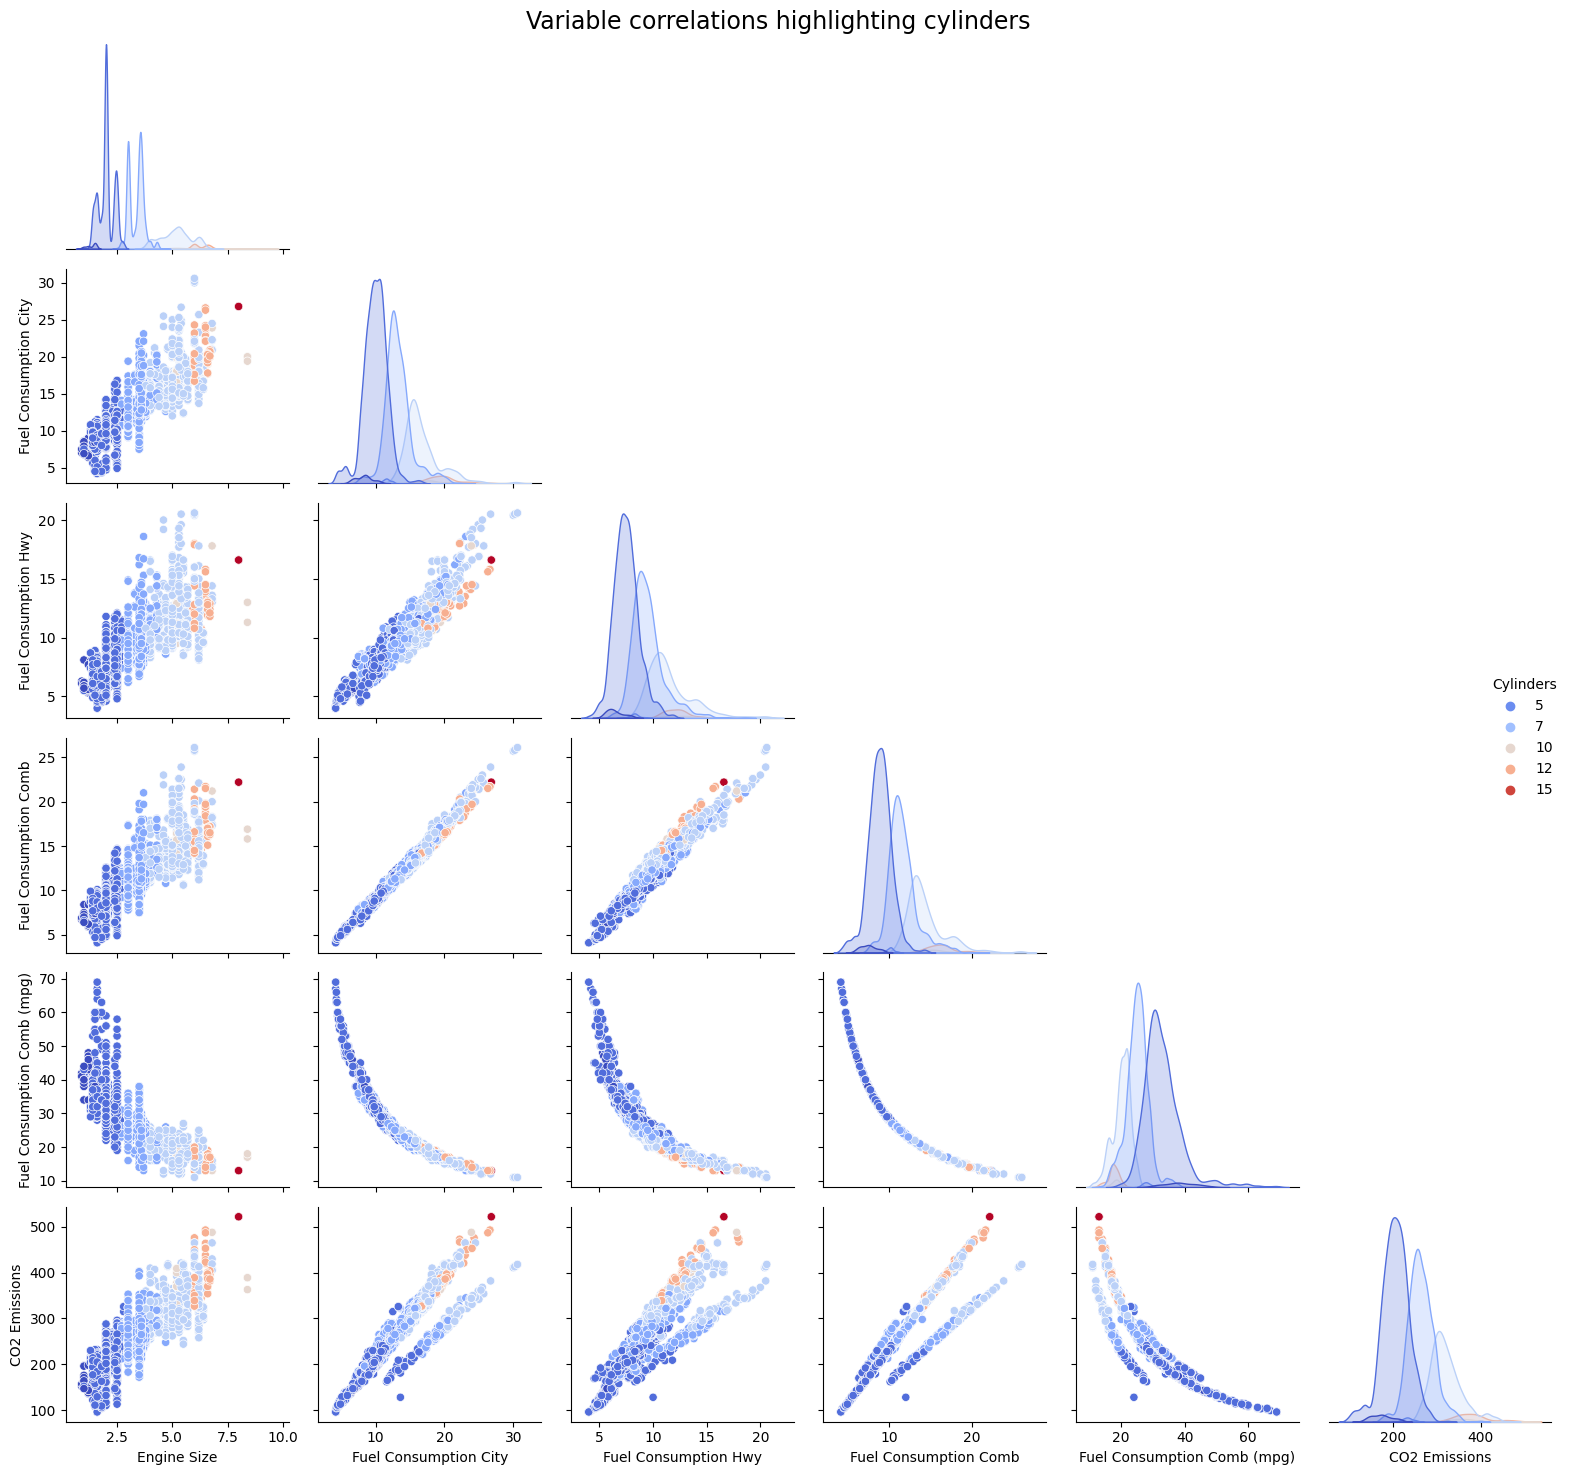

In [23]:
datapplot = sns.pairplot(corr_features, hue='Cylinders', corner=True, palette='coolwarm')
datapplot.fig.suptitle('Variable correlations highlighting cylinders', fontsize='17');
save_fig('scatter_plot_cylinder_highlight')



The ggplot above provides a similar insight into the correlations while also depicting the range of values for each column. The Cylinders key help us solidy what we found in the figure before this one; the higher the Cylinder, the higher the CO2 Emissions and less Cylinders, the lower fuel consumption.

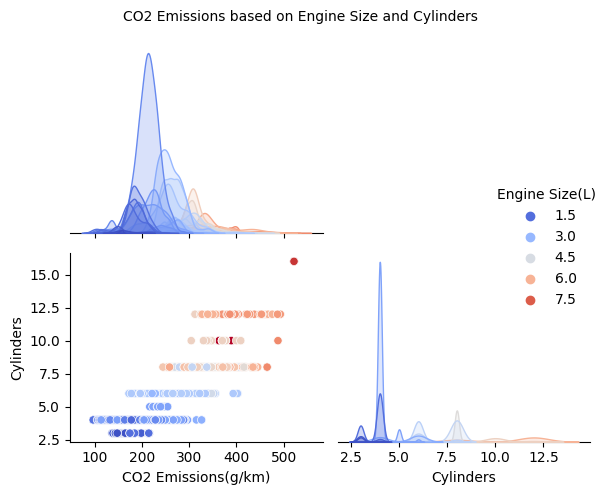

In [24]:
#Engine size information
engn = ['Engine Size(L)','CO2 Emissions(g/km)', 'Cylinders']

# print(data[engn])
engn_data = sns.pairplot(car_data[engn], hue='Engine Size(L)', corner=True, palette='coolwarm')
engn_data.fig.suptitle('CO2 Emissions based on Engine Size and Cylinders', fontsize='10');
save_fig('Scatter_plot_engine_size_CO2')

In the figure above, we hone in on our findings. This figure paints a clearer picture on the relationship between Cylinders and CO2 Emissions.

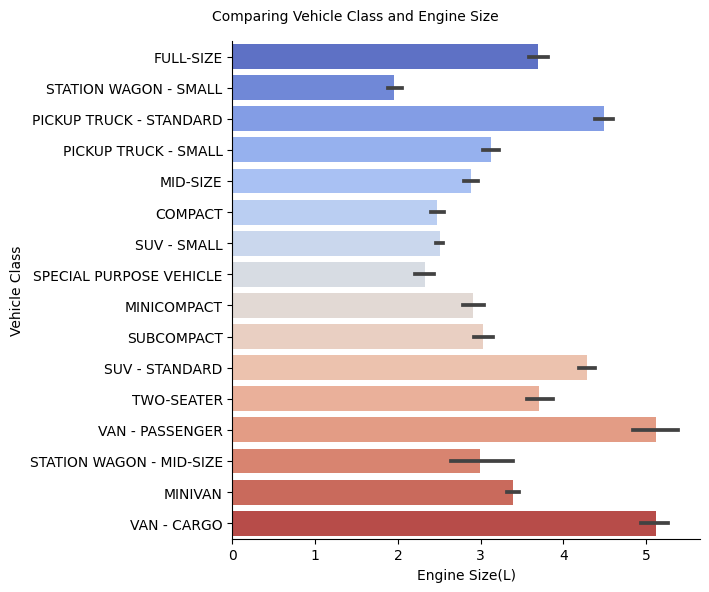

In [25]:
cat_plot = sns.catplot(data=car_data, x='Engine Size(L)', y='Vehicle Class', kind='bar', palette='coolwarm', height=6, aspect=1.2)
cat_plot.fig.suptitle('Comparing Vehicle Class and Engine Size', fontsize='10')
plt.subplots_adjust(top=0.93, wspace=1);
save_fig('Vehicle_class_and_Engine_Size')



###  Preparing dataset for model feed

In [26]:
car_df = strat_train_set.copy()
car_labels = strat_train_set['CO2 Emissions(g/km)'].copy()

To clean the data, let's first deal with empty values in the data set. We'll use SimpleImputer to replace null values with the median of value of that column. We will need to separate numeric and categorical values since we can't calculate the median for categorical values.

#### Preparing numerical values 

In [27]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [28]:
#separate categorical values

cat_vals = ['Make', 'Model', 'Vehicle Class', 'Transmission', 
           'Fuel Type',]

In [29]:
car_nums = car_df.drop(cat_vals, axis=1)
car_nums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5908 entries, 6096 to 3051
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Engine Size(L)                    5908 non-null   float64
 1   Cylinders                         5908 non-null   int64  
 2   Fuel Consumption City (L/100 km)  5908 non-null   float64
 3   Fuel Consumption Hwy (L/100 km)   5908 non-null   float64
 4   Fuel Consumption Comb (L/100 km)  5908 non-null   float64
 5   Fuel Consumption Comb (mpg)       5908 non-null   int64  
 6   CO2 Emissions(g/km)               5908 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 369.2 KB


#### Creating number pipeline

Creating a pipeline is the most efficient way of processing the data before feeding it to a model. For our numeric pipeline we are using SimpleImputer() to replace empty values with the median of that column. When we first saw the data we noticed that the values for each row varied from 0 to the 300s range. Our model would interpret the differences in values as more significant than they are, making wrong assumption about our data. To "equal the playing field" of each feature, we are using StandardScaler() to scale down the ranges of values between 0 - 1. 

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer 


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

car_num_trans = num_pipeline.fit_transform(car_nums)

In [62]:
car_num_trans

array([[-0.33749011,  0.21097925,  0.41504885, ...,  0.35752076,
        -0.48382812,  0.51789689],
       [-1.00202218, -0.88385203, -0.84423332, ..., -0.85439613,
         0.76186764, -0.88265047],
       [-0.11597942,  0.21097925, -0.58665288, ..., -0.36962938,
         0.20822508,  0.24461936],
       ...,
       [ 0.32704196,  0.21097925,  0.07160825, ...,  0.11513738,
        -0.34541748,  0.24461936],
       [-0.85434839, -0.88385203, -0.84423332, ..., -0.81976994,
         0.76186764, -0.83141093],
       [-0.5590008 , -0.88385203, -0.78699322, ..., -0.75051754,
         0.623457  , -0.79725124]])

#### Transforming categorical column

In [31]:
car_df_cat = car_df['Vehicle Class']
car_df_cat

6096                  FULL-SIZE
5429      STATION WAGON - SMALL
6874    PICKUP TRUCK - STANDARD
847        PICKUP TRUCK - SMALL
2207                   MID-SIZE
                 ...           
1520             SUV - STANDARD
6975                SUV - SMALL
2536             SUV - STANDARD
5179                 TWO-SEATER
3051                    COMPACT
Name: Vehicle Class, Length: 5908, dtype: object

#### Creating full pipeline

A full pipeline transforms both numerical and categorical values for model feed.

In [71]:
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing


num_attribs = list(car_nums)
cat_attribs = ['Vehicle Class']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', preprocessing.OneHotEncoder(), cat_attribs)
])

cars_prepared = full_pipeline.fit_transform(car_df)
cars_prepared

array([[-0.33749011,  0.21097925,  0.41504885, ...,  0.        ,
         0.        ,  0.        ],
       [-1.00202218, -0.88385203, -0.84423332, ...,  0.        ,
         0.        ,  0.        ],
       [-0.11597942,  0.21097925, -0.58665288, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.32704196,  0.21097925,  0.07160825, ...,  0.        ,
         0.        ,  0.        ],
       [-0.85434839, -0.88385203, -0.84423332, ...,  1.        ,
         0.        ,  0.        ],
       [-0.5590008 , -0.88385203, -0.78699322, ...,  0.        ,
         0.        ,  0.        ]])

We are going to build a simple linear regression model that will predict CO2 Emissions based on the features we have explored.

### Model Selection and Experimentation:

#### Linear Regression Model:

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(cars_prepared, car_labels)

LinearRegression()

In [34]:
sample_data = car_data.iloc[:5]
sample_label = car_labels.iloc[:5]
sample_data_prepared = full_pipeline.transform(sample_data)
print('Predictions:', lin_reg.predict(sample_data_prepared))
print('Labels:', list(sample_label))


Predictions: [281. 199. 265. 301. 235.]
Labels: [281, 199, 265, 301, 235]


In [64]:
sample_data_prepared

array([[-0.33749011,  0.21097925,  0.41504885,  0.16471209,  0.35752076,
        -0.48382812,  0.51789689,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-1.00202218, -0.88385203, -0.84423332, -0.8247785 , -0.85439613,
         0.76186764, -0.88265047,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-0.11597942,  0.21097925, -0.58665288,  0.02978155, -0.36962938,
         0.20822508,  0.24461936,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    

### Setting up validation scores

In [35]:
from sklearn.metrics import mean_squared_error

cars_predictions = lin_reg.predict(cars_prepared)
lin_mse = mean_squared_error(car_labels, cars_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

9.080547067538497e-14

In [36]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())

In [37]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(car_labels, cars_predictions)
lin_mae

6.878842639562405e-14

In [38]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, cars_prepared, car_labels,
                            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [6.32321500e-14 1.08867264e-13 1.37890908e-13 2.33310534e-14
 1.10485809e-13 9.92576168e-14 8.07873091e-14 4.90191628e-14
 7.26430600e-14 4.28807325e-14]
Mean: 7.883950649534109e-14
Standard Deviation: 3.3699222572951176e-14


#### Decision Tree Regressor

In [39]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(cars_prepared, car_labels)

DecisionTreeRegressor()

In [40]:
cars_predictions = tree_reg.predict(cars_prepared)
tree_mse = mean_squared_error(car_labels, cars_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [41]:
scores = cross_val_score(tree_reg, cars_prepared, car_labels, 
                         scoring='neg_mean_squared_error',
                        cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [42]:
display_scores(tree_rmse_scores)

Scores: [0.21766333 0.57145879 0.19727415 0.29375911 0.50379272 0.15931325
 0.52193834 0.26338934 0.26361245 0.13018891]
Mean: 0.31223903862823976
Standard Deviation: 0.15219851159634054


It appears that the Decision Tree Regressor performs better than the Linear Regression model.

#### Random Forest Regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(cars_prepared, car_labels)

RandomForestRegressor()

In [44]:
cars_predictions = forest_reg.predict(cars_prepared)
forest_mse = mean_squared_error(car_labels, cars_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.09780131988869127

In [45]:
forest_rmse_scores = cross_val_score(forest_reg, cars_prepared, car_labels,
                                    scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_rmse_scores)
display_scores(forest_rmse_scores)

Scores: [0.58763053 0.24523065 0.2176987  0.54541482 0.31096705 0.15624886
 0.35853292 0.1682361  0.20624405 0.28026985]
Mean: 0.30764735307309815
Standard Deviation: 0.14244299784666326


RandomForestRegressor seems to perform the best

#### Support Vector Regression

In [46]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(cars_prepared, car_labels)
cars_predictions = svm_reg.predict(cars_prepared)
svm_mse = mean_squared_error(car_labels, cars_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.03617995739134655

### Fine-Tuning Model

### Grid Search

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4, 8]},
]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(cars_prepared, car_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4, 8],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [48]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 8, 'n_estimators': 10}

Looking at the scores of the different combinations of features measured using GridSearch:

In [49]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

4.951190667484599 {'max_features': 2, 'n_estimators': 3}
3.7374190255506234 {'max_features': 2, 'n_estimators': 10}
3.6051206062653494 {'max_features': 2, 'n_estimators': 30}
4.8206005565427725 {'max_features': 4, 'n_estimators': 3}
3.3654319993743322 {'max_features': 4, 'n_estimators': 10}
2.8627370055276145 {'max_features': 4, 'n_estimators': 30}
3.626200139269314 {'max_features': 6, 'n_estimators': 3}
2.7896126229771836 {'max_features': 6, 'n_estimators': 10}
2.2547780709110588 {'max_features': 6, 'n_estimators': 30}
2.9573487588484944 {'max_features': 8, 'n_estimators': 3}
2.239824759793727 {'max_features': 8, 'n_estimators': 10}
1.9157323769678936 {'max_features': 8, 'n_estimators': 30}
3.950835932006435 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3.4671227736350336 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
4.544545014082351 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2.9599142513961985 {'bootstrap': False, 'max_features': 3, 'n_esti

In [50]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016244,0.004803,0.001455,0.000262,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-37.831902,-23.763278,...,-24.514289,7.079121,20,-9.410803,-7.421868,-9.908144,-6.786357,-8.367252,-8.378885,1.170953
1,0.036253,0.000518,0.003013,0.000190,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-18.563692,-12.454953,...,-13.968301,3.215959,16,-3.738941,-2.756873,-3.210923,-3.173127,-2.835718,-3.143117,0.347616
2,0.104755,0.000686,0.007928,0.000145,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-17.098884,-12.768008,...,-12.996895,2.385141,13,-2.169365,-2.290231,-2.034634,-2.254663,-2.089645,-2.167708,0.096310
3,0.013540,0.001636,0.001190,0.000060,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-29.558981,-17.518519,...,-23.238190,6.085740,19,-4.499600,-4.849697,-10.069140,-6.384858,-3.948961,-5.950451,2.212460
4,0.039324,0.001013,0.002851,0.000158,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-17.387540,-11.527466,...,-11.326133,3.618695,11,-2.595305,-1.863395,-2.850042,-2.317814,-1.685985,-2.262508,0.436045
5,0.112815,0.000283,0.007443,0.000137,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-14.348578,-7.737988,...,-8.195263,3.386322,8,-1.507312,-1.394935,-1.373376,-1.289235,-1.074179,-1.327807,0.144651
6,0.013641,0.000346,0.001127,0.000028,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-31.582294,-9.223350,...,-13.149327,9.356574,14,-2.556318,-3.956106,-4.969248,-5.920175,-3.613343,-4.203038,1.153780
7,0.042752,0.000506,0.002684,0.000174,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-16.409206,-6.292648,...,-7.781939,4.379049,7,-1.250646,-1.078741,-1.395990,-1.260224,-2.038692,-1.404859,0.332529
8,0.126696,0.002224,0.007073,0.000224,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-10.624764,-4.302947,...,-5.084024,2.834427,4,-0.805871,-0.819231,-0.835707,-0.669577,-0.887354,-0.803548,0.072467
9,0.014575,0.000397,0.001070,0.000037,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-12.115905,-10.313969,...,-8.745912,2.715275,9,-1.712348,-4.070508,-2.854869,-3.013915,-2.656959,-2.861720,0.754634


#### Ramdomized Search

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=params_distribs,
                               n_iter=10, cv=5, scoring='neg_mean_squared_error', 
                               random_state=42)
rnd_search.fit(cars_prepared, car_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x132a42a90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x132a43410>},
                   random_state=42, scoring='neg_mean_squared_error')

In [52]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

1.8969016822465647 {'max_features': 7, 'n_estimators': 180}
2.605349048355685 {'max_features': 5, 'n_estimators': 15}
3.1645474011876136 {'max_features': 3, 'n_estimators': 72}
2.5560020977373012 {'max_features': 5, 'n_estimators': 21}
1.9053721321240056 {'max_features': 7, 'n_estimators': 122}
3.167233826985329 {'max_features': 3, 'n_estimators': 75}
3.1743114972208835 {'max_features': 3, 'n_estimators': 88}
2.3943480409648483 {'max_features': 5, 'n_estimators': 100}
3.067330346846694 {'max_features': 3, 'n_estimators': 150}
3.840182114588808 {'max_features': 5, 'n_estimators': 2}


## Analyzing the best peforming models and their performance

In [53]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.21308678e-02, 2.61994048e-02, 1.36594222e-01, 1.77659544e-02,
       2.51585328e-01, 2.41923606e-01, 3.02225616e-01, 2.19265403e-04,
       3.84532937e-04, 7.21408261e-05, 5.32459527e-06, 8.13048475e-06,
       2.44741423e-04, 3.98051591e-04, 1.10921362e-05, 1.22557211e-06,
       1.48160927e-05, 3.22200661e-05, 2.01020803e-04, 9.91225565e-03,
       6.63794983e-05, 1.39441357e-06, 2.40906610e-06])

In [54]:
attributes = num_attribs + cat_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.30222561605161957, 'CO2 Emissions(g/km)'),
 (0.25158532826344204, 'Fuel Consumption Comb (L/100 km)'),
 (0.2419236058653163, 'Fuel Consumption Comb (mpg)'),
 (0.13659422224975362, 'Fuel Consumption City (L/100 km)'),
 (0.026199404841596757, 'Cylinders'),
 (0.017765954415016282, 'Fuel Consumption Hwy (L/100 km)'),
 (0.012130867754121609, 'Engine Size(L)'),
 (0.00021926540250508266, 'Vehicle Class')]

## Evaluating model on the test set

In [77]:
X_test = pd.DataFrame(strat_test_set.drop('CO2 Emissions(g/km)', axis=1))

In [78]:
y_test = strat_test_set['CO2 Emissions(g/km)'].copy

In [79]:
final_model = grid_search.best_estimator_

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

KeyError: "['CO2 Emissions(g/km)'] not in index"